<a href="https://colab.research.google.com/github/adnanahmed60222-cmd/nooha-asp/blob/main/decision_tree_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("Obesity Classification.csv")
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


In [ ]:
#split the data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop(['ID', 'Label'], axis=1)
y = df['Label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(max_depth=3)#post pruning
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#applying cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X_train,y_train,cv= 8,scoring = 'accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [1.  1.  1.  1.  1.  1.  1.  0.9]
Mean accuracy: 0.9875


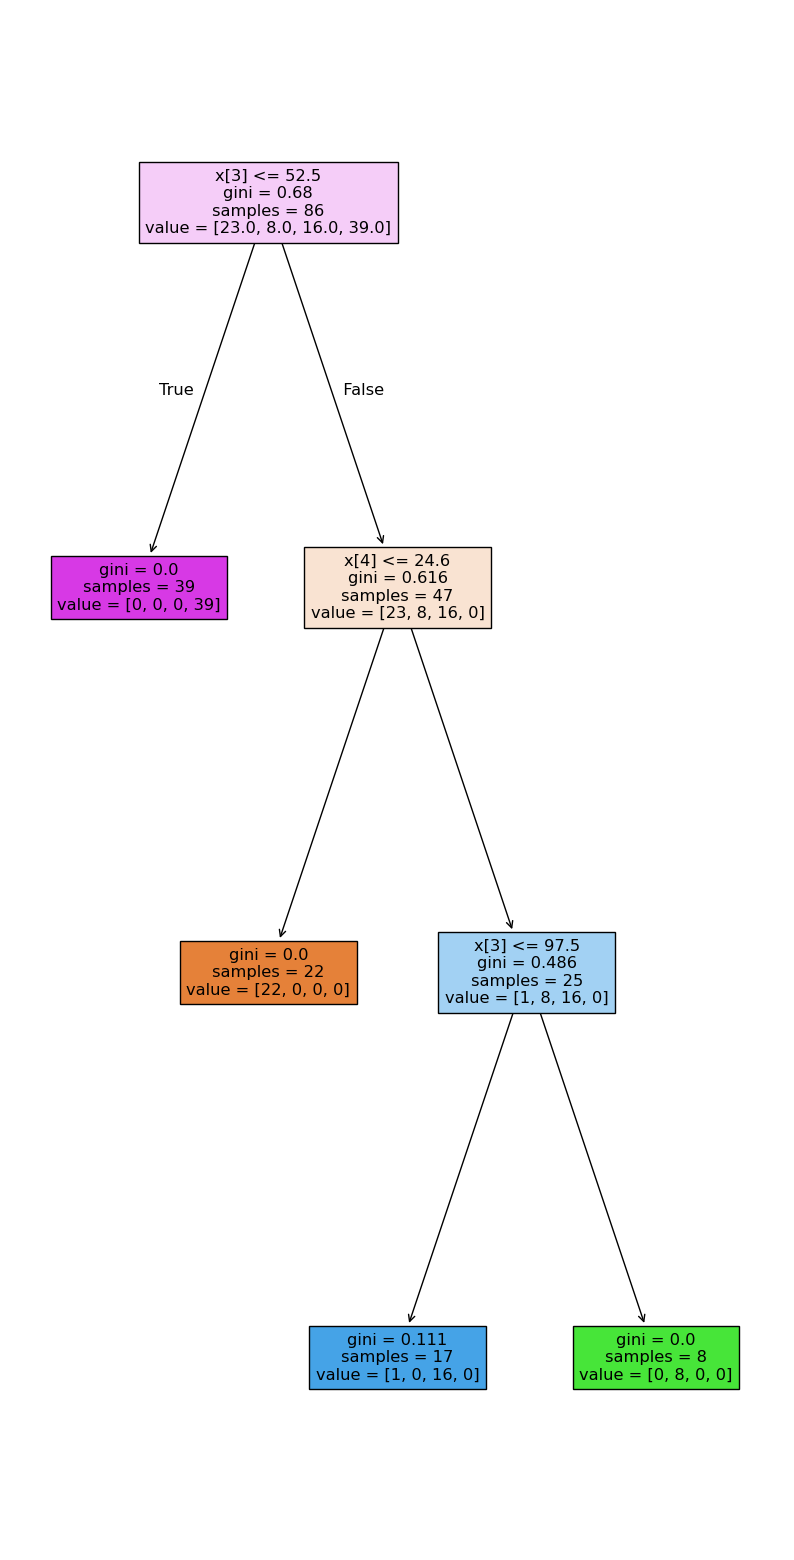

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
tree.plot_tree(model,filled=True)
plt.show()


In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
sc = accuracy_score(y_test,y_pred)
print(sc)

0.9090909090909091
